# **Imbalance Classification** :
It is also called rare event modelling.
Imbalanced data occurs when the distribution of classes in a classification dataset is not equal, meaning that one class significantly outnumbers the other(s). Dealing with imbalanced data is crucial in machine learning, as models trained on such data may be biased towards the majority class and perform poorly on the minority class.
Here are some common strategies to address imbalanced data:

**Resampling:**

Oversampling: Increase the number of instances in the minority class by duplicating or creating synthetic samples.

Undersampling: Reduce the number of instances in the majority class by removing samples randomly or based on certain criteria.

**Generate Synthetic Samples:**

Techniques like Synthetic Minority Over-sampling Technique (SMOTE) create synthetic samples in the feature space to balance the class distribution.

**Use Different Algorithms:**

Some algorithms are less sensitive to class imbalance. For example, tree-based algorithms like Random Forests or gradient boosting methods often handle imbalanced data well.

**Modify Algorithm Parameters:**

Adjust the algorithm's hyperparameters, such as class weights or evaluation metrics, to give more importance to the minority class.

**Ensemble Methods:**

Combine predictions from multiple models to improve performance on imbalanced data. Techniques like Bagging or Boosting can be helpful.
Cost-sensitive Learning:

Adjust the misclassification costs during training to penalize errors on the minority class more heavily.

**Evaluation Metrics:**

Use evaluation metrics that provide a more comprehensive view of model performance, such as precision, recall, F1-score, and area under the precision-recall curve.

**Anomaly Detection:**

Treat the minority class as an anomaly and use anomaly detection techniques.


---


**Use Cases:**


1.   Fraud event detection
2.   Severe disease diagnosis
3.   Credit card ivitation response

In [6]:
pip install imbalanced-learn


# Install and Import Libraries

In [8]:
# Creating the modelling dataset
from sklearn.datasets import make_classification

# Data processing
import pandas as pd
import numpy as np

# Data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Model and performance
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

# Over sampling and under sampling
from imblearn.over_sampling import RandomOverSampler, SMOTE
from imblearn.under_sampling import RandomUnderSampler, NearMiss
from collections import Counter

# Create Imbalanced Dataset
Using make_classification , we created an imbalnce dataswt with two classes. The minority class is 0.5% of the dataset. Used two features to predict which type- each data point belongs to.

In [12]:
# Create an imbalnced dataset
x,y= make_classification(n_samples=100000, n_features=2, n_informative=2,
                         n_redundant=0, n_repeated=0, n_classes=2,
                         n_clusters_per_class=1,
                         weights=[0.995,0.005],
                         class_sep=0.5, random_state=0)
# Convert the data from numpy array to a pandas datframe
df=pd.DataFrame({'feature1': x[:,0],'feature2': x[:,1], 'target':y})

# Check the target distribution
df['target'].value_counts(normalize= True)

0    0.9897
1    0.0103
Name: target, dtype: float64

# Dataset gives us around 1% data points for the minority class.

In [13]:
# Check the count of each class
df['target'].value_counts()

0    98970
1     1030
Name: target, dtype: int64

In [14]:
df.head()

,feature1,feature2,target
0,1.236497,0.579272,0
1,-0.188720,-0.022001,0
2,-0.653844,0.794309,0
3,0.005572,0.593370,0
4,0.482573,0.796902,0


<Axes: xlabel='feature1', ylabel='feature2'>

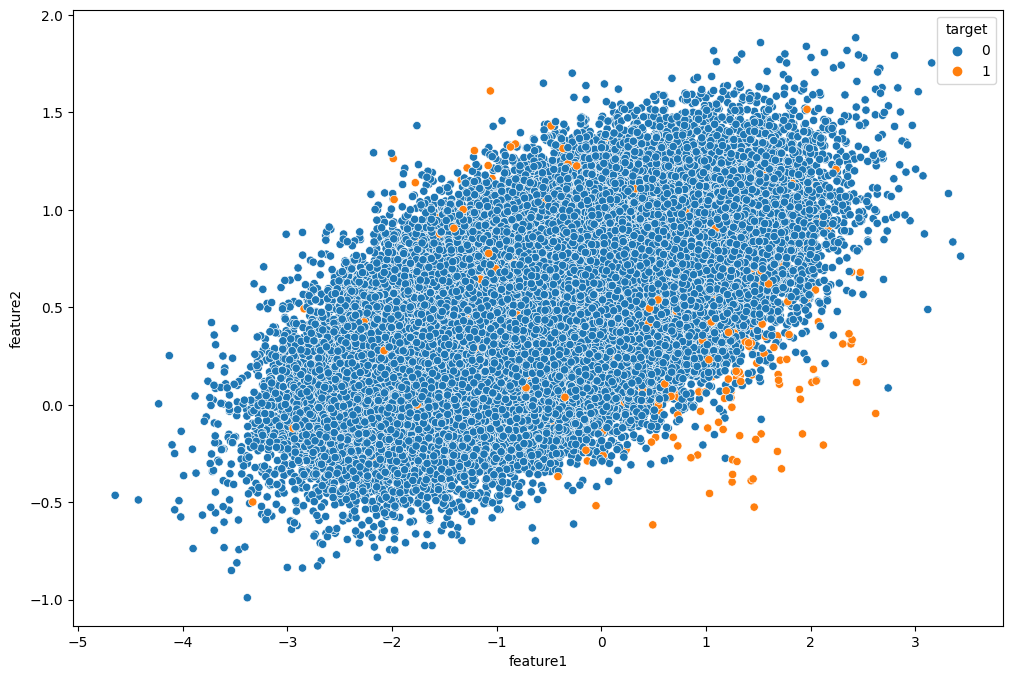

In [15]:
# Visualize the data
plt.figure(figsize=(12,8))
sns.scatterplot(x='feature1', y='feature2', hue='target', data=df)

**Train test split**



In [17]:
# Splkit the datset  into 80% tranning data and 20% validation data.
x_train, x_test, y_train, y_test= train_test_split(x,y, test_size=0.2, random_state=42)
x_train.shape, x_test.shape

((80000, 2), (20000, 2))

In [18]:
# Check the majority and minority classes for the tranning dataset
print(sorted(Counter(y_train).items()))

[(0, 79183), (1, 817)]


# Decide the Performance Metric
The most critical performnce metric for the rare event modelling is usually  the minrotiy class recall and precison.

1.  Fraud detection: We would like to maximize the TP rate  and capture  as many fraud case as possible so recall for the minority class is  the metric we would like to optimize.

2. Spam email classifaction
We would like to minimize the false positive rate and not misclassify any important email as  spam , so the precision for the  minority class is the metric we would like to optimize.


# Basline Model



In [19]:
# Train the random forest model
rf=RandomForestClassifier()

baseline_model= rf.fit(x_train, y_train)
baseline_prediction= baseline_model.predict(x_test)

In [20]:
# Check the model performance
print(classification_report(y_test, baseline_prediction))

              precision    recall  f1-score   support

           0       0.99      1.00      0.99     19787
           1       0.42      0.02      0.04       213

    accuracy                           0.99     20000
   macro avg       0.70      0.51      0.52     20000
weighted avg       0.98      0.99      0.98     20000



#1. Random Over Sampling

One way of oversampling is to generate new samples for the minority class by sampling with replacement . The RandomOverSampler from the imblearn library provides such functionality. Note that we apply Oversampling technique to trainning data set only.

In [26]:
#randomly over smaple the minority class

ros=RandomOverSampler(random_state=42)
x_train_ros, y_train_ros=ros.fit_resample(x_train,y_train)

# Check the number of record after over sampling
Counter(y_train_ros).items()

dict_items([(0, 79183), (1, 79183)])

After oversampling , the minority caterogy  increased from 817 to 79183, which is same as the majority category.

Text(0.5, 1.0, 'Random Over Sampling')

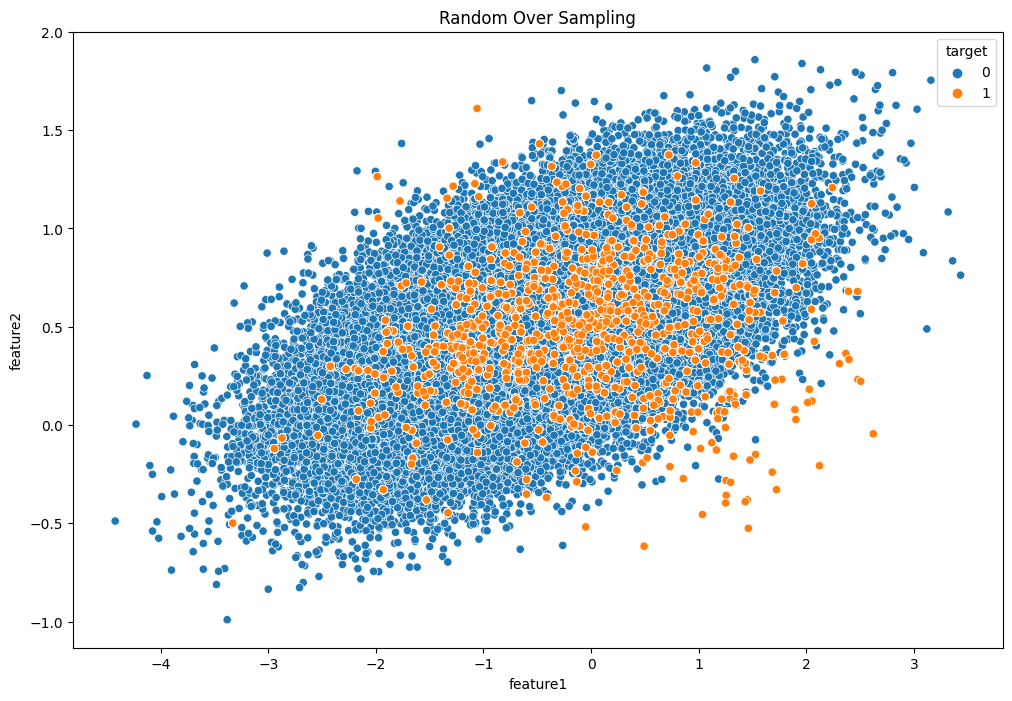

In [46]:
# Convert the data from numpy array to a pandas dataframe
df_ros= pd.DataFrame({'feature1': x_train_ros[:,0], 'feature2': x_train_ros[:,1], 'target': y_train_ros})

# Graph Random Over Sampling
plt.figure(figsize=(12,8))
sns.scatterplot(x='feature1', y='feature2', hue='target', data=df_ros)
plt.title('Random Over Sampling')

#Train same model on oversample data

In [30]:
# Train the random forest model
ros_model= rf.fit(x_train_ros, y_train_ros)
ros_prediction= ros_model.predict(x_test)

# check the model performance
print(classification_report(y_test, ros_prediction))

              precision    recall  f1-score   support

           0       0.99      1.00      0.99     19787
           1       0.16      0.03      0.05       213

    accuracy                           0.99     20000
   macro avg       0.57      0.52      0.52     20000
weighted avg       0.98      0.99      0.98     20000



We can see that random oversampling did not provide a better result. We get the same recall and the similar f1-score, and the precision decreased. Thus, the random oversampling has worse performance than the baseline model with no class ratio adjustment.

# **2. SMOTE(Synthetic Minority Oversampling Technique) Oversampling**, Instead of randomly oversampling with replacement , it takes each minority sample and introduce synthetic data points connecting the moinority sample and its nearest neighbors. Neighbors from the k nearest neighbors are chosen randomly.

In [41]:
# SMOTE sampling the minority class
smote= SMOTE(random_state=42)
x_train_smote, y_train_smote= smote.fit_resample(x_train,y_train)


# Number of record after SMOTE
print(sorted(Counter(y_train_smote).items()))


[(0, 79183), (1, 79183)]


Similarily to random oversampling , the minority category increased from 817 to 79183 after SMOTE oversampling.

Text(0.5, 1.0, 'SMOTE')

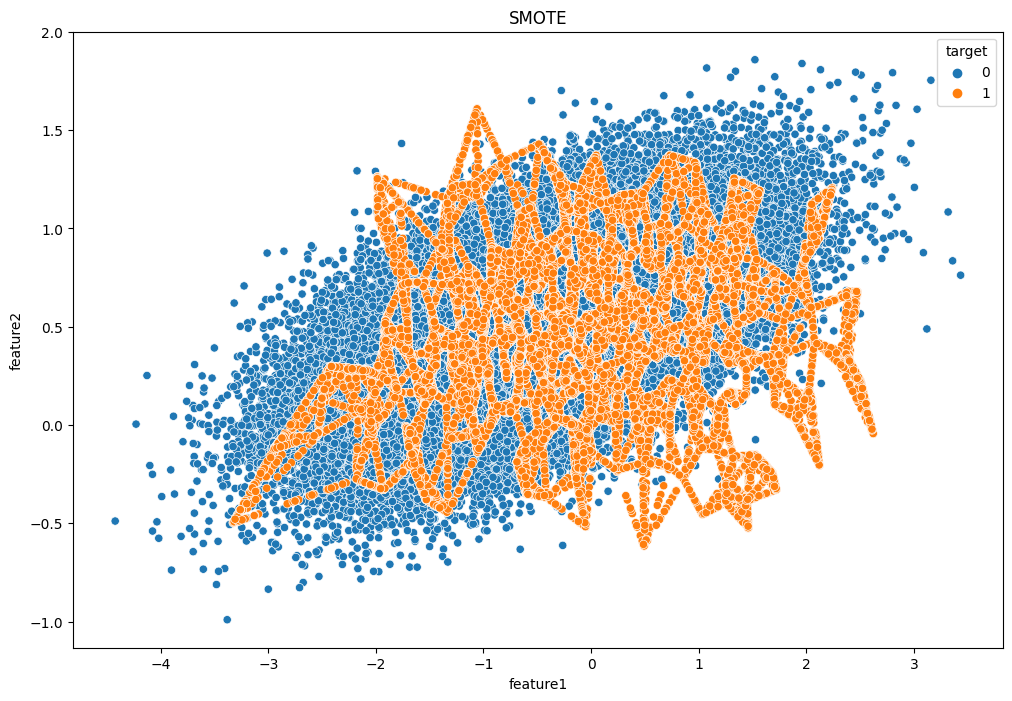

In [33]:
# Graph SMOTE
# Convert the data from numpy array to a pandas dataframe
df_smote= pd.DataFrame({'feature1': x_train_smote[:,0], 'feature2': x_train_smote[:,1], 'target': y_train_smote})

# plot the chart
plt.figure(figsize=(12,8))
sns.scatterplot(x='feature1', y='feature2', hue='target', data=df_smote)
plt.title('SMOTE')

In [34]:
# Train the random forest model
smote_model= rf.fit(x_train_smote, y_train_smote)
smote_prediction= smote_model.predict(x_test)

# check the model performance
print(classification_report(y_test, smote_prediction))

              precision    recall  f1-score   support

           0       0.99      0.84      0.91     19787
           1       0.01      0.23      0.03       213

    accuracy                           0.83     20000
   macro avg       0.50      0.53      0.47     20000
weighted avg       0.98      0.83      0.90     20000



We can see that model using SMOTE inreased recall from 0.03 to o.23. Thus it has significantly improved the model's ability to caputre the minority class.

#**3. Random Under Sampling**

In [42]:
#Randomly under smaple the minority class

rus=RandomUnderSampler(random_state=42)
x_train_rus, y_train_rus=rus.fit_resample(x_train,y_train)

# Check the number of record after under sampling
Counter(y_train_rus).items()

dict_items([(0, 817), (1, 817)])

# After Under sampling , the majority category decreased from 79183 to 817 which is the same as the minority category

The visualization shows that we have less data points for the model.

Text(0.5, 1.0, 'RUS')

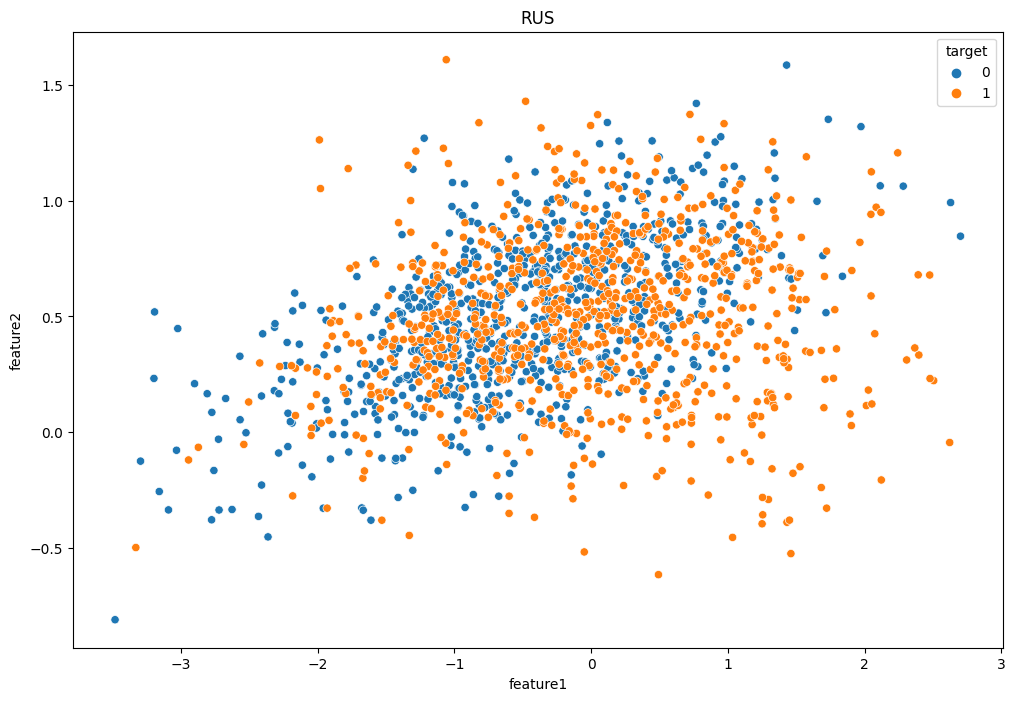

In [45]:
# Graph Under Sampling
# Convert the data from numpy array to a pandas dataframe
df_rus= pd.DataFrame({'feature1': x_train_rus[:,0], 'feature2': x_train_rus[:,1], 'target': y_train_rus})

# plot the chart
plt.figure(figsize=(12,8))
sns.scatterplot(x='feature1', y='feature2', hue='target', data=df_rus)
plt.title('RUS')

In [37]:
# Train the random forest model
rus_model= rf.fit(x_train_rus, y_train_rus)
rus_prediction= smote_model.predict(x_test)

# check the model performance
print(classification_report(y_test, rus_prediction))

              precision    recall  f1-score   support

           0       0.99      0.59      0.74     19787
           1       0.01      0.53      0.03       213

    accuracy                           0.59     20000
   macro avg       0.50      0.56      0.38     20000
weighted avg       0.98      0.59      0.73     20000



We can see that model using rus inreased recall to 0.50. Thus it has significantly improved the model's ability to caputre the minority class and better then oiversampling.

---



# **4. Under Sampling Using NEarMiss**
NearMiss from imblearn uses the KNN to do i=undersampling.

Version:

1.   NearMiss-1 Select the postive samples for which the avg dis to the N closest samples of the negative class is the smallest.
2.   NearMiss-2 Select the postive samples for which the avg dis to the N
 farthest samples of the negative class is the smallest.
# 3.   NearMiss-3 is a 2 step algo. First, for each negative sample, their M nearest neighbors will be kept. Then the positive samples selected are the one for which the avg distance to the  N nearest-neighbors is the largest.



In [43]:
# NearMiss Under smaple the minority class

nearmiss=NearMiss(version=3)
x_train_nearmiss, y_train_nearmiss=nearmiss.fit_resample(x_train,y_train)

# Check the number of record after NearMiss under sampling
Counter(y_train_nearmiss).items()

dict_items([(0, 817), (1, 817)])

Text(0.5, 1.0, 'NearMiss')

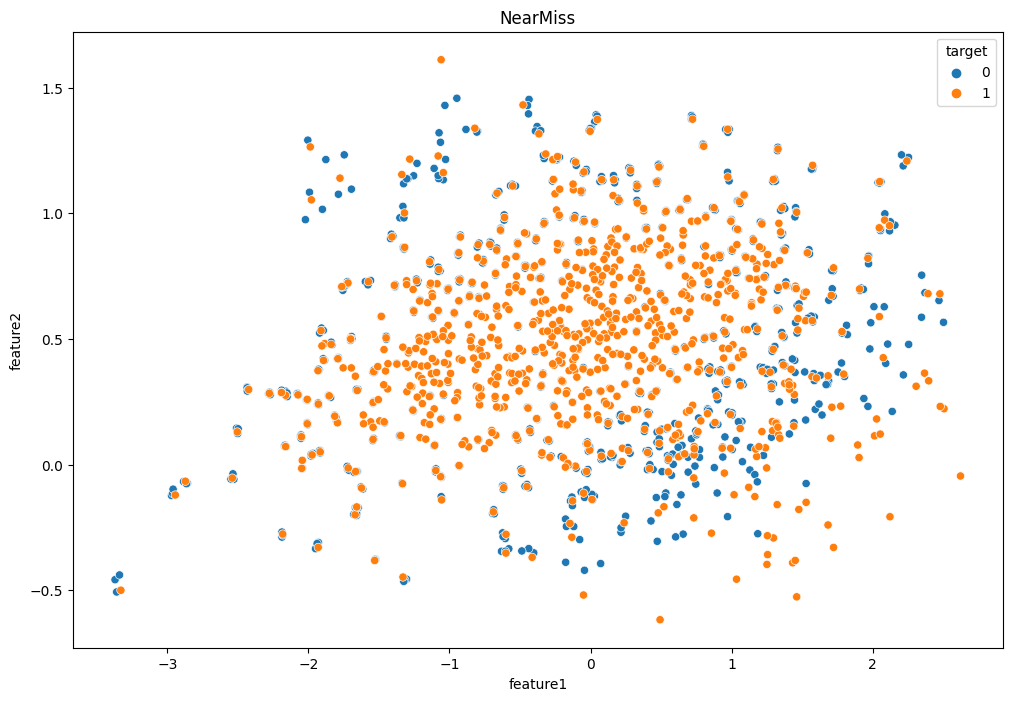

In [44]:
# Graph NearMiss
# Convert the data from numpy array to a pandas dataframe
df_nearmiss= pd.DataFrame({'feature1': x_train_nearmiss[:,0], 'feature2': x_train_nearmiss[:,1], 'target': y_train_nearmiss})

# plot the chart
plt.figure(figsize=(12,8))
sns.scatterplot(x='feature1', y='feature2', hue='target', data=df_nearmiss)
plt.title('NearMiss')

In [40]:
# Train the random forest model
nearmiss_model= rf.fit(x_train_nearmiss, y_train_nearmiss)
nearmiss_prediction= nearmiss_model.predict(x_test)

# check the model performance
print(classification_report(y_test, nearmiss_prediction))

              precision    recall  f1-score   support

           0       0.99      0.38      0.55     19787
           1       0.01      0.58      0.02       213

    accuracy                           0.38     20000
   macro avg       0.50      0.48      0.29     20000
weighted avg       0.98      0.38      0.55     20000



NearMiss gives the recall values  of 0.57, which is the highest among the four methods.

